## Web Scraping For Mobile Phone Details :
---

<center><img src="https://www.dfarber.com/media/1190/web-scraping-services.gif?anchor=center&amp;mode=crop&amp;width=1140&amp;upscale=false&amp;rnd=132607100590000000" jsaction="load:XAeZkd;" jsname="HiaYvf" class="n3VNCb KAlRDb" alt="Web scraping development to help your company prosper" data-noaft="1" style="width: 900px; height: 386.0524137931035px; margin: 2.55395px 0px;"></center>

### Approach Note :  
To Fetch the data using Web Scraping using Python, we need to go through the following steps

1. Install required python modules like - pandas, numpy and BeautifulSoup etc.
2. Collect all the URLS which you want to scrape
3. Think all possible fields of infomation you wanna collect, hera we collecting - price, rating, rating_review and its descriptions etc with brand name.
3. Get the data address you want to extract from the urls by inspecting the page.
5. Below code can be utilezed to extract the data and store to in required format. 

### Data Source : 
<a href="https://www.flipkart.com/search?q=iphone&otracker=search&otracker1=search&marketplace=FLIPKART&as-show=on&as=off">
<img src="https://icubeelectronics.com/wp-content/uploads/2018/06/flipkart-logo.png" jsaction="load:XAeZkd;" jsname="HiaYvf" class="n3VNCb KAlRDb" alt="Flipkart Logo Flash Sales, 60% OFF | www.quadrantkindercentra.nl" data-noaft="1" style="width: 130px; height: 62.75862068965517px; margin: 0px;"></a> 

<img src="https://raw.githubusercontent.com/aakash8004/Web-Scraping-Phone-Details-BeautifulSoup/fa1c2aa7a587abf03ccc7feabae6b2e18d156da3/Screenshot%20(505).png">

### Required Library :

In [2]:
from datetime import datetime, date
from IPython.display import display, HTML
import requests
from scipy import stats
import numpy as np
import pandas as pd
from tqdm import tqdm
from bs4 import BeautifulSoup
import warnings
warnings.filterwarnings("ignore")

### Web Scrapper : A User Define Function

In [3]:
def flipkart_web_scrapper(URL):
    r= requests.get(URL)
    data=r.text
    soup=BeautifulSoup(data)
    
    products = []             # List to store name of the product
    prices = []               # List to store price of the product
    ratings = []              # List to store rating of the product
    review_ratings = []       # List to count of review and ratings
    features = []             # List to features of phone

    for a in soup.findAll('div', attrs={'class':'_3pLy-c row'}):
        name=a.find('div', attrs={'class':'_4rR01T'})
        price=a.find('div', attrs={'class':"_30jeq3 _1_WHN1"})
        rating=a.find('div', attrs={'class':"_3LWZlK"})
        review_rating = a.find('span',attrs = {'class':"_2_R_DZ"})
        feature = a.find('ul',attrs = {'class':"_1xgFaf"})
        products.append(np.nan if name == None else name.text)
        prices.append(np.nan if price == None else price.text)
        ratings.append(np.nan if rating == None else rating.text)
        review_ratings.append(np.nan if review_rating == None else review_rating.text)
        features.append([i.text for i in feature.children])

    temp = pd.DataFrame([products,prices,ratings,review_ratings,features]).T
    temp.columns = ['Model','Prices','Rating','Review_Rating','Features']
    return temp

def get_number_of_pages(URL):
    r= requests.get(URL)
    data=r.text
    soup = BeautifulSoup(data)
    number_of_pages = int([i.find('span').text for i in soup.find_all('div',attrs = {'class':'_2MImiq'})][0].split()[-1])
    return number_of_pages

def get_phone_level_details(base_url):
    phone_master = pd.DataFrame()
    number_of_pages = get_number_of_pages(base_url+'2')
    for pn in tqdm(range(1,number_of_pages+1)):
        temp = flipkart_web_scrapper(base_url+str(pn))
        temp['Page Number'] = pn
        phone_master = phone_master.append(temp,ignore_index = True)
    return phone_master

### URLS : Mobile Phone Urls of different Brand from Flipkart

In [4]:
url_master = { 
    "Samsung": """https://www.flipkart.com/search?q=samsung+mobiles&sid=tyy%2C4io&as=on&as-show=on&otracker=AS_QueryStore_OrganicAutoSuggest_1_2_na_na_ps&otracker1=AS_QueryStore_OrganicAutoSuggest_1_2_na_na_ps&as-pos=1&as-type=RECENT&suggestionId=samsung+mobiles%7CMobiles&requestId=bca735df-4e51-4b55-bd9c-3f9d43a744c2&as-backfill=on&page=""",
    "Xiaomi" : """https://www.flipkart.com/search?q=xiaomi+mobiles&as=on&as-show=on&otracker=AS_Query_OrganicAutoSuggest_4_2_na_na_na&otracker1=AS_Query_OrganicAutoSuggest_4_2_na_na_na&as-pos=4&as-type=RECENT&suggestionId=xiaomi+mobiles&requestId=82419741-cebd-4e08-8351-eda8f3f0b1ac&as-backfill=on&page=""",
    "Vivo" : """https://www.flipkart.com/search?q=vivo+mobiles&sid=tyy%2C4io&as=on&as-show=on&otracker=AS_QueryStore_OrganicAutoSuggest_1_4_na_na_ps&otracker1=AS_QueryStore_OrganicAutoSuggest_1_4_na_na_ps&as-pos=1&as-type=RECENT&suggestionId=vivo+mobiles%7CMobiles&requestId=7ed81aaf-0f52-40ba-b02d-404bdda0aa2e&as-searchtext=Vivo&page=""",
    "Huawei" : """https://www.flipkart.com/search?q=huawei+mobiles&sid=tyy%2C4io&as=on&as-show=on&otracker=AS_QueryStore_OrganicAutoSuggest_1_6_na_na_ps&otracker1=AS_QueryStore_OrganicAutoSuggest_1_6_na_na_ps&as-pos=1&as-type=RECENT&suggestionId=huawei+mobiles%7CMobiles&requestId=7429e63f-2203-4b99-a606-5809978443c1&as-searchtext=Huawei&page=""",
    "Oppo" : """https://www.flipkart.com/search?q=oppo+mobile&sid=tyy%2C4io&as=on&as-show=on&otracker=AS_QueryStore_OrganicAutoSuggest_1_3_na_na_ps&otracker1=AS_QueryStore_OrganicAutoSuggest_1_3_na_na_ps&as-pos=1&as-type=RECENT&suggestionId=oppo+mobile%7CMobiles&requestId=f33bf060-8592-431e-afe0-ac4c46d45c3b&as-searchtext=Opp&page=""",
    "Realme" : """https://www.flipkart.com/search?q=realme+mobile&sid=tyy%2C4io&as=on&as-show=on&otracker=AS_QueryStore_OrganicAutoSuggest_1_2_na_na_na&otracker1=AS_QueryStore_OrganicAutoSuggest_1_2_na_na_na&as-pos=1&as-type=RECENT&suggestionId=realme+mobile%7CMobiles&requestId=b3b09f9e-6a6b-4441-af99-4f3638e72d66&as-backfill=on&page=""",
    "Motorola" : """https://www.flipkart.com/search?q=motorola+mobiles&sid=tyy%2C4io&as=on&as-show=on&otracker=AS_QueryStore_OrganicAutoSuggest_1_4_na_na_ps&otracker1=AS_QueryStore_OrganicAutoSuggest_1_4_na_na_ps&as-pos=1&as-type=RECENT&suggestionId=motorola+mobiles%7CMobiles&requestId=6eee5334-5ca2-43d4-972c-d7247438bce2&as-backfill=on&page=""",
    "Intex" : """https://www.flipkart.com/search?q=intex+mobile&sid=tyy%2C4io&as=on&as-show=on&otracker=AS_QueryStore_OrganicAutoSuggest_1_5_na_na_ps&otracker1=AS_QueryStore_OrganicAutoSuggest_1_5_na_na_ps&as-pos=1&as-type=RECENT&suggestionId=intex+mobile%7CMobiles&requestId=02ac7010-c5d4-4768-b1e7-7eec6c1c24e1&as-searchtext=Intex&page=""",
    "Micromax" : """https://www.flipkart.com/search?q=micromax+mobiles&sid=tyy%2C4io&as=on&as-show=on&otracker=AS_QueryStore_OrganicAutoSuggest_1_5_na_na_ps&otracker1=AS_QueryStore_OrganicAutoSuggest_1_5_na_na_ps&as-pos=1&as-type=RECENT&suggestionId=micromax+mobiles%7CMobiles&requestId=1e5e24ce-9ee4-4451-b7ed-3f15eeebf7a9&as-searchtext=Micro&page=""",
    "Lenovo" : """https://www.flipkart.com/search?q=lenovo+mobile&sid=tyy%2C4io&as=on&as-show=on&otracker=AS_QueryStore_OrganicAutoSuggest_1_4_na_na_ps&otracker1=AS_QueryStore_OrganicAutoSuggest_1_4_na_na_ps&as-pos=1&as-type=RECENT&suggestionId=lenovo+mobile%7CMobiles&requestId=bbe09392-8d02-4be6-8d36-9e84dc0062a2&as-searchtext=Leno&page=""",
    "Oneplus" : """https://www.flipkart.com/search?q=oneplus+mobile&sid=tyy%2C4io&as=on&as-show=on&otracker=AS_QueryStore_OrganicAutoSuggest_1_2_na_na_na&otracker1=AS_QueryStore_OrganicAutoSuggest_1_2_na_na_na&as-pos=1&as-type=RECENT&suggestionId=oneplus+mobile%7CMobiles&requestId=a651ce7b-1f46-4d34-b907-aec2ae59588b&as-searchtext=on&page=""",
    "Gionee" : """https://www.flipkart.com/search?q=gionee+mobile&sid=tyy%2C4io&as=on&as-show=on&otracker=AS_QueryStore_OrganicAutoSuggest_1_6_na_na_ps&otracker1=AS_QueryStore_OrganicAutoSuggest_1_6_na_na_ps&as-pos=1&as-type=RECENT&suggestionId=gionee+mobile%7CMobiles&requestId=44fb9d57-3218-4bc1-a893-28e846eacd5d&as-searchtext=gionee&page=""",
    "Lava" : """https://www.flipkart.com/search?q=lava+mobile&sid=tyy%2C4io&as=on&as-show=on&otracker=AS_QueryStore_OrganicAutoSuggest_1_4_na_na_ps&otracker1=AS_QueryStore_OrganicAutoSuggest_1_4_na_na_ps&as-pos=1&as-type=RECENT&suggestionId=lava+mobile%7CMobiles&requestId=454ac513-c220-433c-991d-005d10b14ff7&as-backfill=on&page=""",
    "Itel" : """https://www.flipkart.com/search?q=itel+mobile&sid=tyy%2C4io&as=on&as-show=on&otracker=AS_QueryStore_OrganicAutoSuggest_1_4_na_na_ps&otracker1=AS_QueryStore_OrganicAutoSuggest_1_4_na_na_ps&as-pos=1&as-type=RECENT&suggestionId=itel+mobile%7CMobiles&requestId=2105ccad-4b32-44da-9d4f-9cdf26f47431&as-backfill=on&page=""",
    "Tecno" : """https://www.flipkart.com/search?q=tecno+mobile&sid=tyy%2C4io&as=on&as-show=on&otracker=AS_QueryStore_OrganicAutoSuggest_1_5_na_na_ps&otracker1=AS_QueryStore_OrganicAutoSuggest_1_5_na_na_ps&as-pos=1&as-type=RECENT&suggestionId=tecno+mobile%7CMobiles&requestId=93d40223-9efb-460a-a91e-415bab9c2e38&as-searchtext=tecno&page=""",
    "Google" : """https://www.flipkart.com/search?q=google+mobile&as=on&as-show=on&otracker=AS_Query_OrganicAutoSuggest_4_6_na_na_ps&otracker1=AS_Query_OrganicAutoSuggest_4_6_na_na_ps&as-pos=4&as-type=RECENT&suggestionId=google+mobile&requestId=3e35ac6c-93fd-44e7-8338-3bc12cc07913&as-backfill=on&page=""",
    "Asus" : """https://www.flipkart.com/search?q=asus+mobile&sid=tyy%2C4io&as=on&as-show=on&otracker=AS_QueryStore_OrganicAutoSuggest_1_4_na_na_ps&otracker1=AS_QueryStore_OrganicAutoSuggest_1_4_na_na_ps&as-pos=1&as-type=RECENT&suggestionId=asus+mobile%7CMobiles&requestId=62cf46d5-628d-43ca-9482-104796dec06d&as-searchtext=Asus&page=""",
    "Infinix" : """https://www.flipkart.com/search?q=infinix+mobile&sid=tyy%2C4io&as=on&as-show=on&otracker=AS_QueryStore_OrganicAutoSuggest_1_2_na_na_ps&otracker1=AS_QueryStore_OrganicAutoSuggest_1_2_na_na_ps&as-pos=1&as-type=RECENT&suggestionId=infinix+mobile%7CMobiles&requestId=605bb181-266c-4210-8c78-65a5e1b7d5da&as-searchtext=In&page=""",
    "Sony" : """https://www.flipkart.com/search?q=sony+mobile&otracker=search&otracker1=search&marketplace=FLIPKART&as-show=on&as=off&page=""",
    "HTC" : """https://www.flipkart.com/search?q=htc+mobiles&sid=tyy%2C4io&as=on&as-show=on&otracker=AS_QueryStore_OrganicAutoSuggest_1_3_na_na_ps&otracker1=AS_QueryStore_OrganicAutoSuggest_1_3_na_na_ps&as-pos=1&as-type=RECENT&suggestionId=htc+mobiles%7CMobiles&requestId=dbe379ce-d54a-447b-9292-54b019936772&as-searchtext=htc&page=""",
    "Redmi" : """https://www.flipkart.com/search?q=redmi+mobile&sid=tyy%2C4io&as=on&as-show=on&otracker=AS_QueryStore_OrganicAutoSuggest_1_4_na_na_ps&otracker1=AS_QueryStore_OrganicAutoSuggest_1_4_na_na_ps&as-pos=1&as-type=RECENT&suggestionId=redmi+mobile%7CMobiles&requestId=a684970d-c8e5-4863-998d-28fdcac6ac10&as-backfill=on&page=""",
    "Iphone" : """https://www.flipkart.com/search?q=iphone&otracker=search&otracker1=search&marketplace=FLIPKART&as-show=on&as=off&page="""
}

### Featching the Info on Urls iterations:

In [5]:
flipkart_master = pd.DataFrame()
for phone_name,url in url_master.items():
    print(phone_name)
    temp = get_phone_level_details(base_url = url)
    temp['Phone Name'] = phone_name
    flipkart_master = flipkart_master.append(temp,ignore_index = True)

Samsung


100%|██████████████████████████████████████████████████████████████████████████████████| 42/42 [01:14<00:00,  1.77s/it]


Xiaomi


100%|██████████████████████████████████████████████████████████████████████████████████| 26/26 [00:46<00:00,  1.80s/it]


Vivo


100%|██████████████████████████████████████████████████████████████████████████████████| 13/13 [00:23<00:00,  1.79s/it]


Huawei


100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:10<00:00,  1.52s/it]


Oppo


100%|██████████████████████████████████████████████████████████████████████████████████| 12/12 [00:16<00:00,  1.37s/it]


Realme


100%|██████████████████████████████████████████████████████████████████████████████████| 16/16 [00:21<00:00,  1.35s/it]


Motorola


100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:10<00:00,  1.44s/it]


Intex


100%|██████████████████████████████████████████████████████████████████████████████████| 16/16 [00:21<00:00,  1.36s/it]


Micromax


100%|██████████████████████████████████████████████████████████████████████████████████| 19/19 [00:36<00:00,  1.91s/it]


Lenovo


100%|████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:11<00:00,  1.92s/it]


Oneplus


100%|████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:17<00:00,  3.46s/it]


Gionee


100%|████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:10<00:00,  2.56s/it]


Lava


100%|██████████████████████████████████████████████████████████████████████████████████| 23/23 [00:49<00:00,  2.17s/it]


Itel


100%|████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:13<00:00,  1.50s/it]


Tecno


100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:09<00:00,  1.42s/it]


Google


100%|████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:03<00:00,  1.81s/it]


Asus


100%|████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:14<00:00,  1.63s/it]


Infinix


100%|████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:12<00:00,  1.54s/it]


Sony


100%|████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:09<00:00,  1.65s/it]


HTC


100%|████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:04<00:00,  1.63s/it]


Redmi


100%|██████████████████████████████████████████████████████████████████████████████████| 26/26 [00:41<00:00,  1.61s/it]


Iphone


100%|██████████████████████████████████████████████████████████████████████████████████| 16/16 [00:26<00:00,  1.68s/it]


### Scrapped Data : Mobile Phone Details

In [6]:
today = date.today()
print(f'Today Date : {today} , {today.strftime("%A")}')
print(f"Shape of the data : {flipkart_master.shape}")
display(HTML(flipkart_master.sample(7).to_html()))

Today Date : 2022-07-28 , Thursday
Shape of the data : (6292, 7)


,Model,Prices,Rating,Review_Rating,Features,Page Number,Phone Name
2385,"Realme 6i (Lunar White, 64 GB)","₹12,949",4.4,"60,592 Ratings & 6,341 Reviews","[4 GB RAM | 64 GB ROM | Expandable Upto 256 GB, 16.51 cm (6.5 inch) Full HD+ Display, 48MP + 8MP + 2MP + 2MP | 16MP Front Camera, 4300 mAh Battery, MediaTek Helio G90T Processor, Brand Warranty of 1 Year Available for Mobile and 6 Months for Accessories]",8,Realme
3725,"OnePlus Nord CE 2 5G (Gray Mirror, 128 GB)","₹24,995",4.4,919 Ratings & 87 Reviews,"[8 GB RAM | 128 GB ROM, 16.33 cm (6.43 inch) Display, 64MP Rear Camera, 4500 mAh Battery, 1 Year]",3,Oneplus
5285,"HTC Desire 626 Dual SIM LTE (White Birch, 16 GB)","₹11,810",3.7,"1,884 Ratings & 310 Reviews","[2 GB RAM | 16 GB ROM | Expandable Upto 32 GB, 12.7 cm (5 inch) HD Display, 13MP Rear Camera | 5MP Front Camera, 2000 mAh Li-Polymer Battery, MediaTek MT6752 Octa Core 1.3GHz Processor, Brand Warranty of 1 Year]",2,HTC
867,"SAMSUNG Galaxy A6 (Black, 32 GB)","₹11,999",4.3,694 Ratings & 70 Reviews,"[4 GB RAM | 32 GB ROM, 14.22 cm (5.6 inch) Display, 16MP Rear Camera | 16MP Front Camera, 3000 mAh Battery, Brand Warranty of 1 Year Available for Mobile and 6 Months for Accessories]",41,Samsung
4474,Itel It 2190,"₹1,090",4.1,"1,547 Ratings & 143 Reviews","[32 MB RAM | 32 MB ROM | Expandable Upto 32 GB, 4.57 cm (1.8 inch) HQVGA Display, 0.3MP Rear Camera, 1000 mAh Battery, 1 Year]",6,Itel
2560,"Realme Narzo 10A (So White, 64 GB)","₹9,499",4.5,"87,489 Ratings & 5,148 Reviews","[4 GB RAM | 64 GB ROM | Expandable Upto 256 GB, 16.56 cm (6.52 inch) HD+ Display, 12MP + 2MP + 2MP | 5MP Front Camera, 5000 mAh Lithium-ion Battery, MediaTek Helio G70 (12 nm) Processor, Brand Warranty of 1 Year Available for Mobile and 6 Months for Accessories]",15,Realme
2806,Intex Yuvi+,"₹1,990",3.7,40 Ratings & 7 Reviews,"[Expandable Upto 16 GB, 6.1 cm (2.4 inch) QVGA Display, 1.3MP Rear Camera, 1800 mAh Li-Ion Battery, 1 Year for Mobile & 6 Months for Accessories]",3,Intex


### Count Plot : Of different Brand Mobile Phone

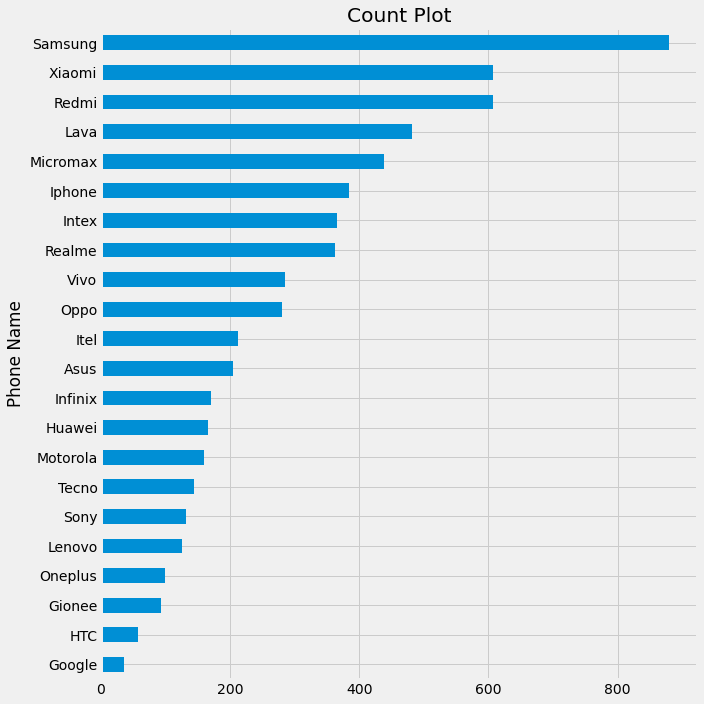

In [7]:
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
fig, axs = plt.subplots(sharey=True, figsize=(10,10))
flipkart_master.groupby('Phone Name')['Model'].count().sort_values().plot(kind = 'barh')
plt.title("Count Plot")
plt.tight_layout()
plt.show()